# Google Stock Market Data Prediction

## Importing the Required libraries

In [60]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [135]:
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



## loading the dataset

In [61]:
df=pd.read_csv('GOOGL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


## EDA


In [62]:
# describing the dataset by using describe method 
# it gives us only numerical values and shows statistical information

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07


In [63]:
# viewing only column names
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [64]:
# checking for the number of rows and columns
df.shape

(4431, 7)

In [65]:
# checking for data types
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [66]:
# checking for null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [67]:
# dropping irrevelent columns such as adj close because it won't be used for the further analysis
df.drop('Adj Close',axis=1,inplace=True)

In [68]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,9188602


<Axes: >

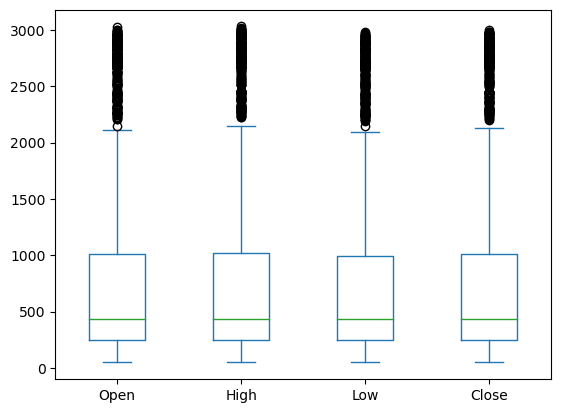

In [69]:
# to find the oulier using boxplot
df[['Open','High','Low','Close']].plot(kind='box')

<Axes: >

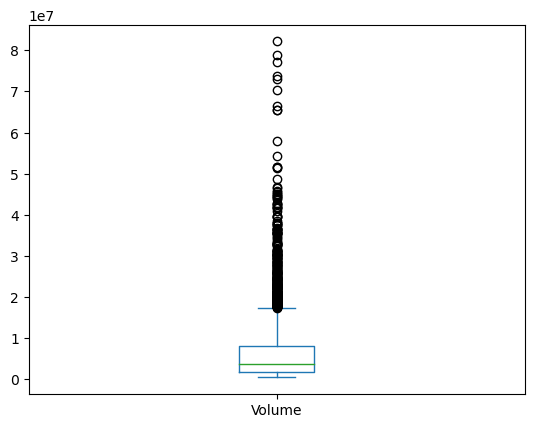

In [70]:
df[['Volume']].plot(kind='box')
#plt.show

In [71]:
# Detecing the outlier using Inter Quartile Range

Q1 = df.quantile(0.25) #Q1 represents 25th percentile of the data
Q3 = df.quantile(0.75) #Q2 represents 75th percentile of the data 

IQR = Q3-Q1
print(IQR)

Open      7.588064e+02
High      7.697966e+02
Low       7.514617e+02
Close     7.593741e+02
Volume    6.306790e+06
dtype: float64


In [72]:
#df = df[~((df<(Q1-1.51)))]

In [73]:
# Finding the upper bond & lower bond 
Lower_limit = Q1-1.5*IQR
Upper_limit = Q3+1.5*IQR
print("Lower Limit is:",Lower_limit)
print("~~~~~~~~~~~~")
print("Upper Limit is:",Upper_limit)

Lower Limit is: Open     -8.896511e+02
High     -9.038416e+02
Low      -8.813792e+02
Close    -8.906452e+02
Volume   -7.764584e+06
dtype: float64
~~~~~~~~~~~~
Upper Limit is: Open      2.145575e+03
High      2.175345e+03
Low       2.124468e+03
Close     2.146851e+03
Volume    1.746257e+07
dtype: float64


In [74]:
df.shape

(4431, 6)

In [75]:
# Removing the outlier 
df_new=df[~((df<(Lower_limit))|(df>(Upper_limit))).any(axis=1)]
df_new.shape

(3861, 6)

<Axes: >

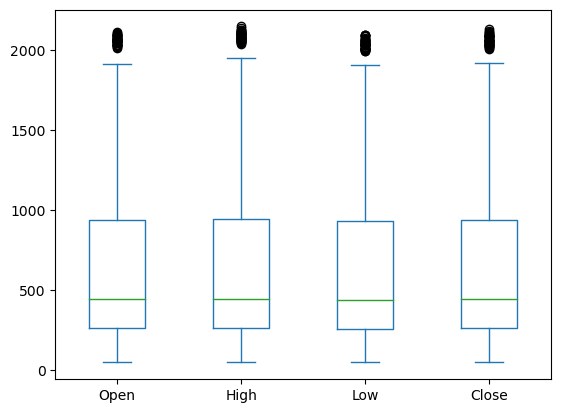

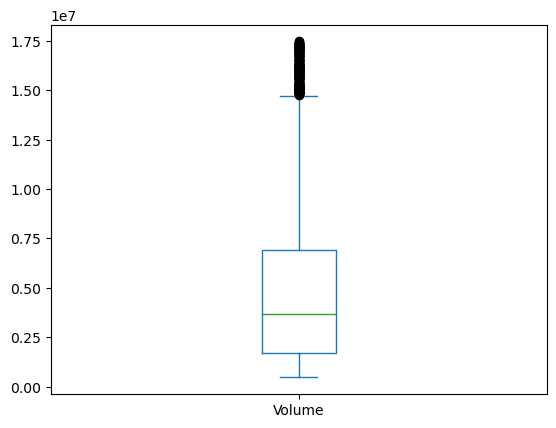

In [76]:
# Plotting the Boxplot
df_new[['Open','High','Low','Close']].plot(kind='box')
df_new[['Volume']].plot(kind='box')

In [77]:
# Removing the duplicate values
df_new.duplicated().sum()

0

In [78]:
# Changing the Date type column for the analysis 
df['Date']=pd.to_datetime(df.Date)
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [79]:
# Importing skew

In [80]:
print(df_new.skew())

Open      1.041833
High      1.050700
Low       1.038817
Close     1.044398
Volume    1.210026
dtype: float64


Skewness of Open is: 1.0414285641685608


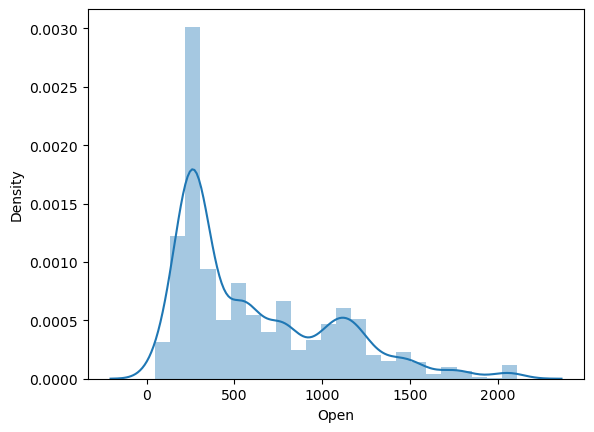

Skewness of High is: 1.0502918405290051


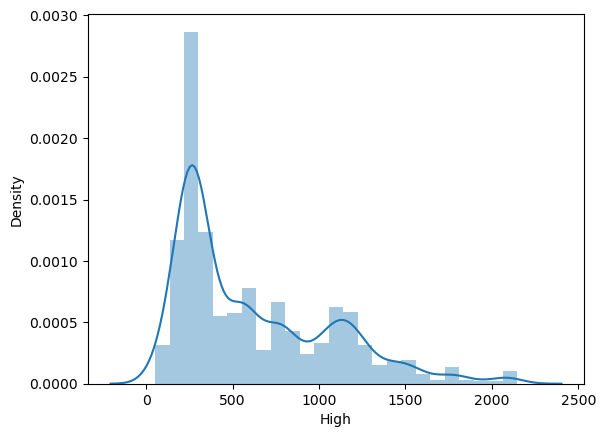

Skewness of Low is: 1.038413327280627


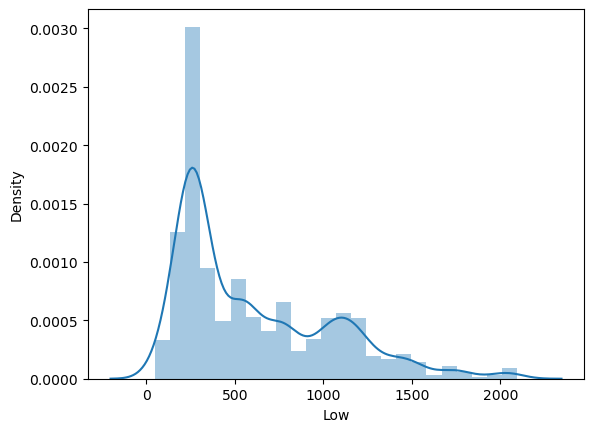

Skewness of Close is: 1.0439923910642186


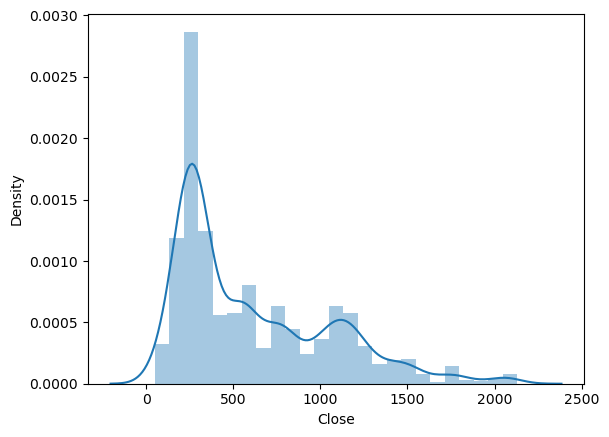

Skewness of Volume is: 1.2095555541338792


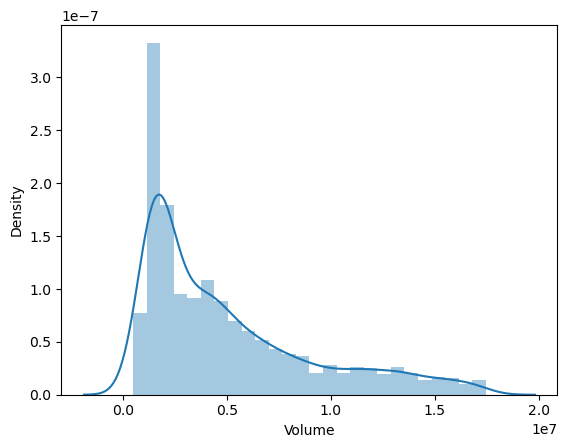

In [81]:
col_nums=df_new[['Open','High','Low','Close','Volume']]
col_nums

for i in col_nums:
    print(f"Skewness of {i} is: {skew(df_new[i])}")
    
    sb.distplot(col_nums[i])
    plt.show()

In [22]:
# Handling the skewness if exist in dataset
#if skewed values lied between -1 to greater than +1, then our data is heavily skewed.

In [23]:
# Heat Map is a type of plot which is 

<Axes: >

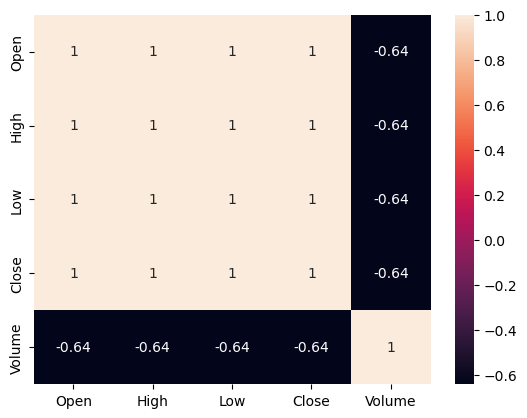

In [82]:
sb.heatmap(df_new.corr(),annot=True)

In [25]:
# Here we can see only Volume has 

In [83]:
df_new['Volume']=skew(df_new['Volume'])
print(f"skewness of volume is",skew(df_new['Volume']))

skewness of volume is nan


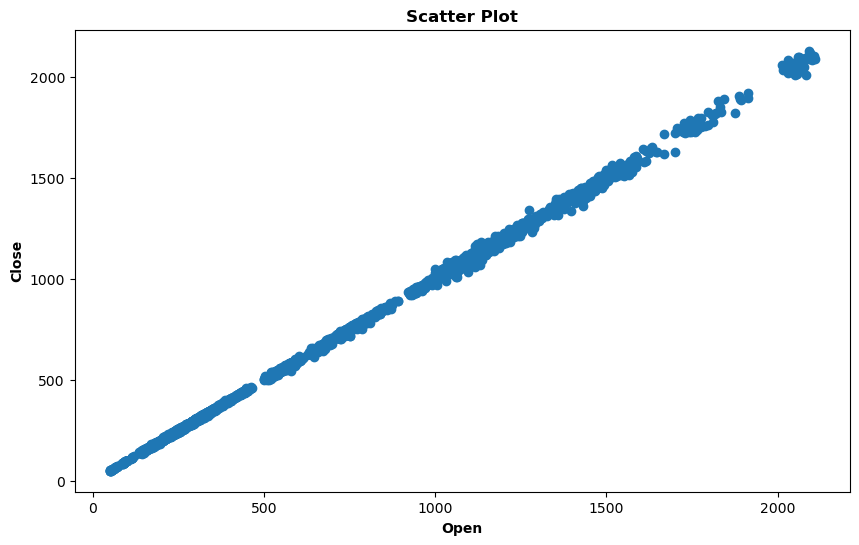

In [85]:
plt.figure(figsize=(10,6))
plt.scatter(df_new['Open'],df_new['Close'])
plt.xlabel('Open',weight='bold')
plt.ylabel('Close',weight='bold')
plt.title('Scatter Plot',weight='bold')
plt.show()

In [88]:
# Selecting input and output 
x = df_new[['Open','High','Low']]
y = df_new['Close']
x

,Open,High,Low
3,55.675674,55.855858,51.836838
4,52.532532,54.054054,51.991993
5,52.527527,54.029030,52.382381
6,54.104103,54.364365,52.897900
7,52.692692,52.797798,51.056057
...,...,...,...
4179,2031.790039,2039.390015,2003.849976
4180,2022.160034,2049.209961,2005.449951
4181,2052.979980,2062.669922,2036.150024
4182,2054.399902,2086.260010,2047.000000


In [89]:
y

3         52.487488
4         53.053055
5         54.009010
6         53.128128
7         51.056057
           ...     
4179    2024.729980
4180    2045.790039
4181    2046.469971
4182    2062.520020
4183    2129.780029
Name: Close, Length: 3861, dtype: float64

In [31]:
# Training the dataset 

In [90]:
# training the model using train test split

In [91]:
# assigning the training and testing into each variable
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [100]:
# importing linear regression
from sklearn.linear_model import LinearRegression

#creating an obj for lr
lr = LinearRegression()

In [101]:
# Training the model with lr
lr.fit(x_train,y_train)

LinearRegression()

In [102]:
lr.coef_

array([-0.56294418,  0.81329917,  0.74919208])

In [103]:
lr.intercept_

0.1694247890021643

In [104]:
y_pred = lr.predict(x_test)
print(y_pred)

[242.88034767 392.18122301 663.90047912 ... 271.58667771 725.05104079
 189.49881296]


In [116]:
# Making a dictionary for undertanding the model

df1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df1)

           Actual    Predicted
1450   238.818817   242.880348
2179   391.671661   392.181223
2803   670.000000   663.900479
1301   276.321320   275.551310
190    120.925926   120.442763
...           ...          ...
2054   372.747742   374.623567
3376  1139.099976  1128.779948
968    271.421417   271.586678
2868   733.070007   725.051041
491    187.942947   189.498813

[1159 rows x 2 columns]


In [117]:
y_pred.shape

(1159,)

In [118]:
y_test.shape

(1159,)

In [119]:
lr.score(x_test,y_test)

0.9998796448473543

In [120]:
lr.score(x_train,y_train)

0.9999014556481864

<Axes: >

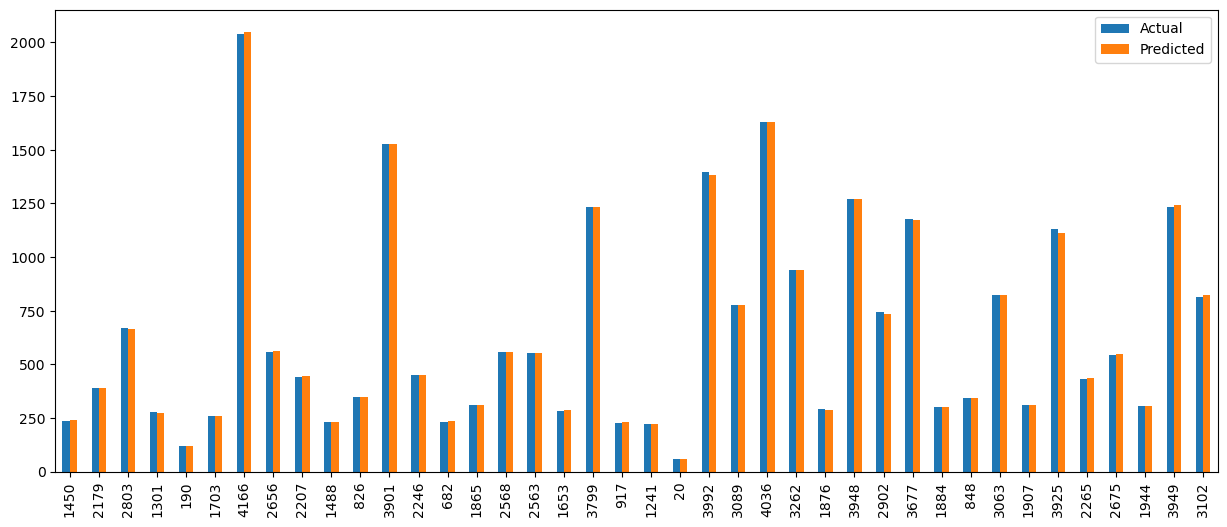

In [121]:
df1.head(40).plot(kind="bar",figsize=(15,6))

In [136]:
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Score:',r2_score(y_test,y_pred))

Mean Squared Error: 23.29625220684284
Root Mean Squared error: 4.826619128006978
R2 Score: 0.9998796448473543


# Prediction for Unknown data 

In [138]:
# [open,high,low]
# lr.predict([[20,24,17.45],[43,23,30],[20,54,34],[23,43,27]])

array([21.50312296, 17.14446817, 58.30122691, 42.42175896])

In [139]:
Open = float(input("Enter the opening price of the share"))
High = float(input("Enter the Highest price of the share"))
Low = float(input("Enter the lowest price of the share"))

stock =[[Open,High,Low]]
close = lr.predict(stock)
print("Closing price of the shaare will be",close)

Enter the opening price of the share42
Enter the Highest price of the share65
Enter the lowest price of the share60
Closing price of the shaare will be [74.34173979]
